In [1]:
import json
import pandas as pd
import numpy as np
from google.colab import drive
from scipy.stats import mode


In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!ls
%cd /

bin	 datalab  home	 lib64	opt	    root  srv		     tmp    var
boot	 dev	  lib	 media	proc	    run   sys		     tools
content  etc	  lib32  mnt	python-apt  sbin  tensorflow-1.15.2  usr
/


In [30]:
%cd /
%cd content/drive/MyDrive
!ls

/
/content/drive/MyDrive
 1may_cleaned.csv  'Copy of 12_WEEKS_new.csv'	 IDS561_Spark
 1may.csv	    COVID_country_differences	'IDS 572 : Assignment 1.gdoc'
 Ancestry.gdoc	    Gro				'Text Analytics Proposal.gdoc'
 Big_Data_Project  'Healthcare Analytics.gdoc'	 VADER_12weeks.csv
'Colab Notebooks'  'IDS 561 - Project.gdoc'	 Weekly_Data


In [14]:
df = pd.read_csv('Copy of 12_WEEKS_new.csv')

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
!pip install twython

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [15]:
def sentiment_dict(x):
  return sid.polarity_scores(x)

def sentiment(x):
  return max(x, key=x.get)

def ind_sentiment(x, polarity):
  return x[polarity]

In [16]:
df.head()

,Unnamed: 0,id,text,ind_org,clean_tokens,clean_text,is_vaccine,Week
0,0,1.388343e+18,"""...despite vaccinations on infected persons, ...",ind,"['despite', 'vaccination', 'infected', 'person...",despite vaccination infected person continue i...,1.0,Week1
1,1,1.388343e+18,“The C.D.C. recommends that people skip their ...,ind,"['recommends', 'people', 'skip', 'second', 'do...",recommends people skip second dose severe alle...,1.0,Week1
2,2,1.388343e+18,Indonesia approves Sinopharm COVID-19 vaccine ...,ind,"['indonesia', 'approves', 'sinopharm', 'covid'...",indonesia approves sinopharm covid vaccine eme...,1.0,Week1
3,3,1.388343e+18,@DrLeanaWen I'm so sorry but I am so confused....,ind,"['sorry', 'confused', 'read', 'report', 'ppl',...",sorry confused read report ppl who ve gotten v...,1.0,Week1
4,4,1.388343e+18,"After Tablighi and Kumbhi Jamaat, here is ""Vac...",ind,"['tablighi', 'kumbhi', 'jamaat', 'vaccination'...",tablighi kumbhi jamaat vaccination jamaat,1.0,Week1


In [ ]:
df.Week.value_counts()

Week9     243255
Week8     237394
Week1     217683
Week2     207437
Week3     204888
Week7     201678
Week5     171995
Week4     170333
Week11    160370
Week12    134488
Week6     127947
Week10    114439
Name: Week, dtype: int64

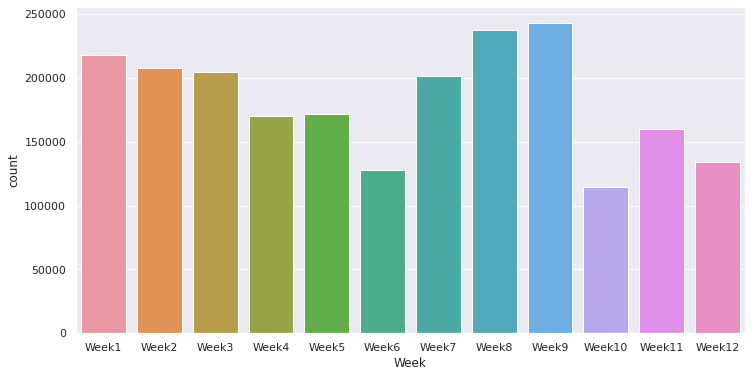

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Week", data=df,order=['Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9','Week10','Week11','Week12'])

In [24]:
df['sentiment_dict'] = df['clean_text'].apply(sentiment_dict)
# df['sentiment'] = df['sentiment_dict'].apply(sentiment)
df['pos'] = df['sentiment_dict'].apply(ind_sentiment, args=(['pos']))
df['neg'] = df['sentiment_dict'].apply(ind_sentiment, args=(['neg']))
df['neu'] = df['sentiment_dict'].apply(ind_sentiment, args=(['neu']))
df['compound'] = df['sentiment_dict'].apply(ind_sentiment, args=(['compound']))

# s.apply(func, convert_dtype=True, args=())

In [28]:
df['is_positive'] = [1 if x>=0.05 else 0 for x in df['compound']]
df['is_negative'] = [1 if x<=-0.05 else 0 for x in df['compound']]

In [29]:
df.to_csv("VADER_12weeks.csv")

In [27]:
# df['compound']

0          0.3875
1         -0.6249
2          0.0258
3          0.7845
4          0.0000
            ...  
2191902    0.5574
2191903    0.0000
2191904    0.2732
2191905   -0.6705
2191906   -0.0139
Name: compound, Length: 2191907, dtype: float64